In [16]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
ex_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome',**ex_path, headless=False)

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 107.0.5304
[WDM] - Get LATEST chromedriver version for 107.0.5304 google-chrome
[WDM] - Driver [C:\Users\JoshuaTean\.wdm\drivers\chromedriver\win32\107.0.5304.62\chromedriver.exe] found in cache


In [3]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
html = browser.html
soup = BeautifulSoup(html,'html.parser')

In [5]:
data_df = pd.read_html(html)[0]
data_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [6]:
data_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [7]:
data_df["terrestrial_date"] = pd.to_datetime(data_df["terrestrial_date"])
data_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [8]:
print(f"In this dataset:")
print(f"Number of Martian Months : {len(data_df['month'].unique())}")
print(f"Number of Martian Days   : {data_df['sol'].max() - data_df['sol'].min()}")

In this dataset:
Number of Martian Months : 12
Number of Martian Days   : 1967


In [9]:
monthly_means = data_df.groupby("month").mean()
monthly_means

,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


Coldest Month: 3
Warmest Month: 8


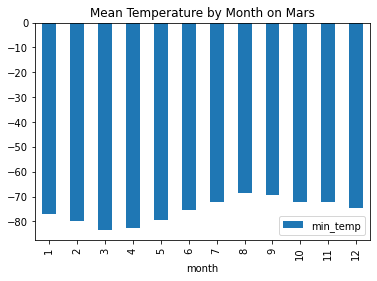

In [10]:
monthly_means.plot.bar(y = "min_temp", title = 'Mean Temperature by Month on Mars')
print(f"Coldest Month: {monthly_means['min_temp'].idxmin()}")
print(f"Warmest Month: {monthly_means['min_temp'].idxmax()}")

Month of Lowest Atmospheric Pressure : 6
Month of Highest Atmospheric Pressure: 9


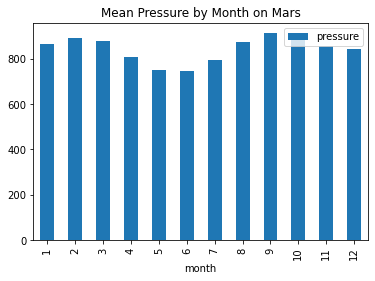

In [12]:
monthly_means.plot.bar(y = "pressure", title = 'Mean Pressure by Month on Mars')
print(f"Month of Lowest Atmospheric Pressure : {monthly_means['pressure'].idxmin()}")
print(f"Month of Highest Atmospheric Pressure: {monthly_means['pressure'].idxmax()}")

The plot shows Mars reaching a peak minimum temperature in 2014 and 2016 earth date. A visual estimate of a Mars year based on the plot is approximately 2 earth years / 730 earth days


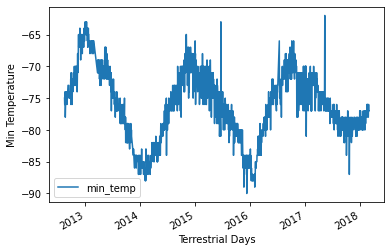

In [21]:
data_df.plot(x = "terrestrial_date", y = "min_temp")
plt.xlabel('Terrestrial Days')
plt.ylabel('Min Temperature')
print(f"The plot shows Mars reaching a peak minimum temperature in 2014 and 2016 earth date. A visual estimate of a Mars year based on the plot is approximately 2 earth years / 730 earth days")

In [22]:
#Export Dataframe to CSV
data_df.to_csv("Martian_Data.csv")